# Import Libraries 📚

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
warnings.filterwarnings('ignore')

# Dataset Information ℹ️


In [20]:
df = pd.read_csv("dataset.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


# 🔑 Các Đặc Trưng Chính:
Giới tính (GENDER): Giới tính của người tham gia (M: Nam, F: Nữ).

Tuổi (AGE): Tuổi của người tham gia khảo sát.

Hút thuốc (SMOKING): Mức độ hút thuốc (1: Có, 2: Không).

Ngón tay bị vàng (YELLOW_FINGERS): Biểu hiện của việc hút thuốc nhiều.

Lo âu (ANXIETY): Tình trạng lo âu của người được khảo sát.

Áp lực từ bạn bè (PEER_PRESSURE): Mức độ bị ảnh hưởng bởi người xung quanh trong thói quen hút thuốc.

Bệnh mãn tính (CHRONIC_DISEASE): Tình trạng có bệnh nền mãn tính (1: Có, 2: Không).

Mệt mỏi (FATIGUE): Cảm giác mệt mỏi thường xuyên.

Dị ứng (ALLERGY): Có tiền sử bị dị ứng.

Thở khò khè (WHEEZING): Dấu hiệu của các vấn đề hô hấp.

Sử dụng rượu bia (ALCOHOL_CONSUMING): Có uống rượu/bia thường xuyên không.

Ho kéo dài (COUGHING): Có triệu chứng ho mãn tính.

Khó thở (SHORTNESS_OF_BREATH): Triệu chứng thở khó, gấp.

Khó nuốt (SWALLOWING_DIFFICULTY): Gặp khó khăn khi nuốt thức ăn hoặc nước.

Đau ngực (CHEST_PAIN): Triệu chứng đau tức vùng ngực.

# 🎯 Biến Mục Tiêu: Khả năng mắc ung thư phổi (LUNG_CANCER)
YES: Người này có khả năng cao mắc ung thư phổi.

NO: Không có dấu hiệu đáng kể liên quan đến ung thư phổi.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
ALCOHOL_CONSUMING,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [ ]:
encode = LabelEncoder()
df['GENDER'] = encode.fit_transform(df['GENDER'])
df['Lung_C'] = encode.fit_transform(df['GENDER'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   int64 
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

# Exploratoty Data Analysis (EDA) 📊

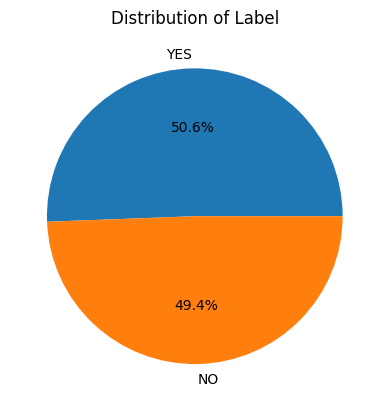

In [23]:
target = df['LUNG_CANCER'].value_counts()
plt.Figure(figsize=(8,8))
plt.pie(target, labels= target.index,autopct='%1.1f%%')
plt.title('Distribution of Label')
plt.show()

<!-- # Training Machine Learning Models 🤖 -->